In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# importing required packages
import re
import csv
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import callbacks
from keras.preprocessing import sequence
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


## Loading Data

In [ ]:
phrase = []
labels = []
test_phrase = []

# Memuat data traning
#path_file_gita_train="/content/drive/My Drive/train.tsv"
#path_file_gita_test="/content/drive/My Drive/test.tsv"
path_file_mega_train="/content/drive/My Drive/train/train.tsv"
path_file_mega_test='/content/drive/My Drive/test/test.tsv'
with open(path_file_mega_train) as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        phrase.append(row[2])
        labels.append(row[3])

# Memuat data testing
with open(path_file_mega_test) as testing:
    test = csv.reader(testing, delimiter="\t", quotechar='"')
    for s in test:
        test_phrase.append(s[2])

## Data preprocessing

In [ ]:
# function to preprocess the sentences of the reviews.
def clean_phrase(phrase):
    #Remove punctuation (with a regular expression) and convert to lower case
    words = (re.sub("[^a-zA-Z]", " ", phrase)).lower()
    return words

In [ ]:
# remove the first row of the train dataset which is currently the header
del phrase[0]
# display first 10 rows
phrase[:10]

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose']

In [ ]:
# remove the first row of the testing dataset which is currently the header
del test_phrase[0]
# display first 10 rows
test_phrase[:10]

['An intermittently pleasing but mostly routine effort .',
 'An intermittently pleasing but mostly routine effort',
 'An',
 'intermittently pleasing but mostly routine effort',
 'intermittently pleasing but mostly routine',
 'intermittently pleasing but',
 'intermittently pleasing',
 'intermittently',
 'pleasing',
 'but']

In [ ]:
# run preprocessing function on train dataset
clean_phrases = []

for x in phrase:
    new = clean_phrase(x)
    clean_phrases.append(new)
    
# run preprocessing function  on test dataset
test_clean_phrases = []

for xw in test_phrase:
    new_test = clean_phrase(xw)
    test_clean_phrases.append(new_test)

In [ ]:
# display first 10 rows
clean_phrases[:10]

['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander   some of which occasionally amuses but none of which amounts to much of a story  ',
 'a series of escapades demonstrating the adage that what is good for the goose',
 'a series',
 'a',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose']

In [ ]:
# display first 10 rows
test_clean_phrases[:10]

['an intermittently pleasing but mostly routine effort  ',
 'an intermittently pleasing but mostly routine effort',
 'an',
 'intermittently pleasing but mostly routine effort',
 'intermittently pleasing but mostly routine',
 'intermittently pleasing but',
 'intermittently pleasing',
 'intermittently',
 'pleasing',
 'but']

In [ ]:
# join the rows as a string with '/n' as delimiter
all_text=' /n '.join(clean_phrases)

test_all_text=' /n '.join(test_clean_phrases)

In [ ]:
# display first 100 characters
all_text[:100]

'a series of escapades demonstrating the adage that what is good for the goose is also good for the g'

In [ ]:
# display first 100 characters
test_all_text[:100]

'an intermittently pleasing but mostly routine effort   /n an intermittently pleasing but mostly rout'

In [ ]:
# split each reviews of the training dataset and join them as a string
reviews = all_text.split(' /n ')
all_text = ' '.join(reviews)

# split each word of the training dataset in the string to a list
words = all_text.split()

In [ ]:
# split each reviews of the training dataset and join them as a string
test_reviews = test_all_text.split(' /n ')
test_all_text = ' '.join(test_reviews)

# split each word of the training dataset in the string to a list
test_words = test_all_text.split()

In [ ]:
words[:10]

['a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is']

In [ ]:
test_words[:10]

['an',
 'intermittently',
 'pleasing',
 'but',
 'mostly',
 'routine',
 'effort',
 'an',
 'intermittently',
 'pleasing']

In [ ]:
# print no of rows for train and test 
print("Train reviews: {}".format(len(reviews)))
print("Test reviews: {}".format(len(test_reviews)))

Train reviews: 156060
Test reviews: 66292


In [ ]:
reviews[:10]

['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander   some of which occasionally amuses but none of which amounts to much of a story  ',
 'a series of escapades demonstrating the adage that what is good for the goose',
 'a series',
 'a',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose']

In [ ]:
test_reviews[:10]

['an intermittently pleasing but mostly routine effort  ',
 'an intermittently pleasing but mostly routine effort',
 'an',
 'intermittently pleasing but mostly routine effort',
 'intermittently pleasing but mostly routine',
 'intermittently pleasing but',
 'intermittently pleasing',
 'intermittently',
 'pleasing',
 'but']

In [ ]:
# remove the first row of the labels which is currently the header
del labels[0]

# display first 10 rows
labels[:10]

['1', '2', '2', '2', '2', '2', '2', '2', '2', '2']

In [ ]:
# preprocessing on the label list
labels_cleaned = '\n'.join(labels)
labels_cleaned_last = labels_cleaned.split('\n')


len(labels_cleaned_last)

156060

In [ ]:
# convert list to an array
labels_sentiment = [int(i) for i in labels_cleaned_last]
labels = np.array(labels_sentiment)
labels

array([1, 2, 2, ..., 3, 2, 2])

In [ ]:
# check number of unique labels in the labels array
np.unique(labels)

array([0, 1, 2, 3, 4])

In [ ]:
len(labels)

156060

In [ ]:
len(words)

1072621

In [ ]:
len(test_words)

423806

In [ ]:
# combine the list that contains the individual words in the datasets
full_words = words + test_words

In [ ]:
len(full_words)

1496427

In [ ]:
#create dictionaries that map the words in the vocabulary to integers. 
#Then we can convert each of our reviews into integers so they can be passed into the network.

from collections import Counter
counts = Counter(full_words)
vocab = sorted(counts, key=counts.get, reverse=True)

#Build a dictionary that maps words to integers
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

In [ ]:
#Encode the words with integers. 

reviews_ints = []
for each in reviews:
    reviews_ints.append([vocab_to_int[word] for word in each.split( )])
    
test_reviews_ints = []
for eachs in test_reviews:
    test_reviews_ints.append([vocab_to_int[word] for word in eachs.split( )])

In [ ]:
# check no of unique words in the corpus
# this will be the features to be extracted
len(vocab_to_int)

17582

In [ ]:
len(reviews_ints)

156060

In [ ]:
len(test_reviews_ints)

66292

In [ ]:
reviews_ints[:10]

[[2,
  315,
  3,
  16380,
  7573,
  1,
  8219,
  9,
  53,
  8,
  47,
  13,
  1,
  3904,
  8,
  186,
  47,
  13,
  1,
  12872,
  61,
  3,
  88,
  591,
  12019,
  19,
  616,
  3,
  88,
  2784,
  5,
  52,
  3,
  2,
  42],
 [2, 315, 3, 16380, 7573, 1, 8219, 9, 53, 8, 47, 13, 1, 3904],
 [2, 315],
 [2],
 [315],
 [3, 16380, 7573, 1, 8219, 9, 53, 8, 47, 13, 1, 3904],
 [3],
 [16380, 7573, 1, 8219, 9, 53, 8, 47, 13, 1, 3904],
 [16380],
 [7573, 1, 8219, 9, 53, 8, 47, 13, 1, 3904]]

In [ ]:
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 159
Maximum review length: 48


In [ ]:
# check total no of rows not having zero length reviews
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]
len(non_zero_idx)

155901

In [ ]:
# remove zero length reviews
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
labels = np.array([labels[ii] for ii in non_zero_idx])

In [ ]:
#check again
review_lens = Counter([len(x) for x in reviews_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 0
Maximum review length: 48


In [ ]:
len(reviews_ints)

155901

In [ ]:
#As maximum review length too many steps for RNN. Let's truncate to 12 steps. 
#For reviews shorter than 12 steps, we'll pad with 0s. For reviews longer than 12 steps,
# we will truncate them to the first 12 characters.

max_review_length = 12
X_train = sequence.pad_sequences(reviews_ints, maxlen=max_review_length)
x_test = sequence.pad_sequences(test_reviews_ints, maxlen=max_review_length)

In [ ]:
print(X_train.shape)

(155901, 12)


In [ ]:
print(x_test.shape)

(66292, 12)


In [ ]:
X_train[:5]

array([[  591, 12019,    19,   616,     3,    88,  2784,     5,    52,
            3,     2,    42],
       [    3, 16380,  7573,     1,  8219,     9,    53,     8,    47,
           13,     1,  3904],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     2,   315],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     2],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   315]], dtype=int32)

In [ ]:
x_test[:5]

array([[   0,    0,    0,    0,    0,   16, 2829, 1796,   19,  528, 1015,
         398],
       [   0,    0,    0,    0,    0,   16, 2829, 1796,   19,  528, 1015,
         398],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16],
       [   0,    0,    0,    0,    0,    0, 2829, 1796,   19,  528, 1015,
         398],
       [   0,    0,    0,    0,    0,    0,    0, 2829, 1796,   19,  528,
        1015]], dtype=int32)

In [ ]:
# check no of unique words in the corpus
# Adding 1 because we use 0's for padding, dictionary started at 1
# this value will be passed to the embedding layer
top_words = len(vocab_to_int) + 1
print(top_words)

17583


In [ ]:
# One Hot Encoding the labels
y_train = np_utils.to_categorical(labels, 5)

In [ ]:
y_train.shape

(155901, 5)

## Training

In [ ]:
# original
# Creating Callbacks
# ModelCheckpoints is used to save the model after every epoch
# EarlyStopping is used to stop training when the validation loss has not improved after 2 epochs
# Tensorboard is used tovisualize dynamic graphs of the training and test metrics
cbks = [callbacks.ModelCheckpoint(filepath='./checkpoint_model.h5', monitor='val_loss', save_best_only=True),
            callbacks.EarlyStopping(monitor='val_loss', patience=2),callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)]

In [ ]:
#editted
cbks = [callbacks.ModelCheckpoint(filepath='./checkpoint_model.new_banget', monitor='val_loss', save_best_only=True)]

In [ ]:
params = {
    'embedding_size': [64, 100, 128],
    'units'         : [100,150,200],
    'l2_ker'        : [0, 0.01],
    'l2_rec'        : [0, 0.01],
    'num_filters'   : [200,250,300],
    'kernel_size'   : [3,4,5],
    'l2_cnn'        : [0, 0.01],
    'l2_dense'      : [0, 0.01],
    'learning_rate' : [1e-2, 1e-3, 1e-4]
}

In [ ]:
# original
# Final Model Architecture

# embedding layer size
embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(19479, embedding_vecor_length, input_length=max_review_length, dropout=0.2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# 1 layer of 100 units in the hidden layers of the LSTM cells
model.add(Bidirectional(LSTM(100)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#model.fit(X_train, y_train,validation_split=0.20, epochs=5,verbose=1, batch_size=32,callbacks=cbks) #nerusin dari epoch 2 yg disave sama orangnya
model.fit(X_train, y_train,validation_split=0.20, epochs=10,verbose=1, batch_size=32) #mulai dari awal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 12, 32)            623328    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1005      
Total params: 733,837
Trainable params: 733,837
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124720 samples, validate on 31181 samples
Epoch 1/10
124720/124720 [==============================] - 146s 1ms/step - loss: 0.9608 - accuracy: 0.6118 - val_loss: 1.0284 - val_accuracy: 0.5846
Epoch 2/10
124720/124720 [==============================] - 143s 1ms/step - loss: 0.7714 - accuracy: 0.6853 - val_loss: 1.0072 - val_accuracy: 0.5949
Epoch 3/10
124720/124720 [==============================] - 140s 1ms/step - loss: 0.6998 - accuracy: 0.7105 - val_loss: 1.0571 - val_accuracy: 0.5889
Epoch 4/10
124720/124720 [==============================] - 141s 1ms/step - loss: 0.6457 - accuracy: 0.7311 - val_loss: 1.0634 - val_accuracy: 0.5892
Epoch 5/10
124720/124720 [==============================] - 140s 1ms/step - loss: 0.6025 - accuracy: 0.7472 - val_loss: 1.0935 - val_accuracy: 0.5793
Epoch 6/10
124720/124720 [==============================] - 141s 1ms/step - loss: 0.5665 - accuracy: 0.7614 - val_loss: 1.1485 - val_accuracy: 0.5633
Epoch 7/10
124720/124720 [=======================

In [ ]:
# editted by mega
# fungsi untuk training
def train(embedding_size, num_filters, kernel_sizes, regularizer, unit, learning_rate):
  model = Sequential()
  model.add(Embedding(19479,embedding_size, input_length=max_review_length, dropout=0.2))
  model.add(Conv1D(filters= num_filters, kernel_size= kernel_sizes, padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(regularizer)))
  model.add(MaxPooling1D(pool_size=2))
  # 1 layer of 100 units in the hidden layers of the LSTM cells
  model.add(Bidirectional(LSTM(unit,kernel_regularizer=keras.regularizers.l2(regularizer))))
  model.add(Dense(5, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
  print(model.summary())
  model.fit(X_train, y_train,validation_split=0.20, epochs=10,verbose=1, batch_size=32,callbacks=cbks)

In [ ]:
for i in range (len(params['l2_cnn'])):
  regularizer=params['l2_cnn'][i]
  for j in range (len(params['embedding_size'])):
    embedding_size=params['embedding_size'][j]
    for k in range (len(params['num_filters'])):
      num_filters=params['num_filters'][k]
      for l in range (len(params['kernel_size'])):
        kernel_sizes=params['kernel_size'][l]
        for m in range (len(params['units'])):
          unit=params['units'][m]
          for n in range (len(params['learning_rate'])):
            learning_rate=params['learning_rate'][k]
            train(embedding_size, num_filters, kernel_sizes, regularizer, unit, learning_rate)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 12, 64)            1246656   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 12, 200)           38600     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 6, 200)            0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 200)               240800    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 1005      
Total params: 1,527,061
Trainable params: 1,527,061
Non-trainable params: 0
_________________________________________________________________
None
Train on 124720 samples, validate on 31181 samples
Epoch 1/10
124720/124720 [===========================

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


124720/124720 [==============================] - 136s 1ms/step - loss: 1.0739 - accuracy: 0.5658 - val_loss: 1.1586 - val_accuracy: 0.5259
Epoch 3/10
124720/124720 [==============================] - 135s 1ms/step - loss: 1.0898 - accuracy: 0.5607 - val_loss: 1.2269 - val_accuracy: 0.5017
Epoch 4/10
124720/124720 [==============================] - 134s 1ms/step - loss: 1.1196 - accuracy: 0.5527 - val_loss: 1.1889 - val_accuracy: 0.5135
Epoch 5/10
124720/124720 [==============================] - 134s 1ms/step - loss: 1.0979 - accuracy: 0.5554 - val_loss: 1.1907 - val_accuracy: 0.5071
Epoch 6/10
124720/124720 [==============================] - 138s 1ms/step - loss: 1.0898 - accuracy: 0.5545 - val_loss: 1.1826 - val_accuracy: 0.5261
Epoch 7/10
124720/124720 [==============================] - 136s 1ms/step - loss: 1.0979 - accuracy: 0.5644 - val_loss: 1.1814 - val_accuracy: 0.5276
Epoch 8/10
124720/124720 [==============================] - 134s 1ms/step - loss: 1.1010 - accuracy: 0.5655 - v

In [ ]:
# editted
# embedding layer size
# embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(19479, params['embedding_size'][0], input_length=max_review_length, dropout=0.2))
model.add(Conv1D(filters=params['num_filters'][0], kernel_size=params['kernel_size'][0], padding='same',
                 activation='relu', kernel_regularizer=keras.regularizers.l2(params['l2_cnn'][0])))
model.add(MaxPooling1D(pool_size=2))
# 1 layer of 100 units in the hidden layers of the LSTM cells
model.add(Bidirectional(LSTM(params['units'][0],kernel_regularizer=keras.regularizers.l2(params['l2_cnn'][0]))))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=params['learning_rate'][0]), 
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train,validation_split=0.20, epochs=5,verbose=1, batch_size=32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 12, 64)            1246656   
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 200)           38600     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 200)            0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1005      
Total params: 1,527,061
Trainable params: 1,527,061
Non-trainable params: 0
_________________________________________________________________
None
Train on 124720 samples, validate on 31181 samples
Epoch 1/5
124720/124720 [============================

In [ ]:
#to visualize the training graphs
#run "tensorboard --logdir='./logs' "  from the command terminal

## Testing

In [ ]:
# load the saved model
# returns a compiled model
model = load_model('checkpoint_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


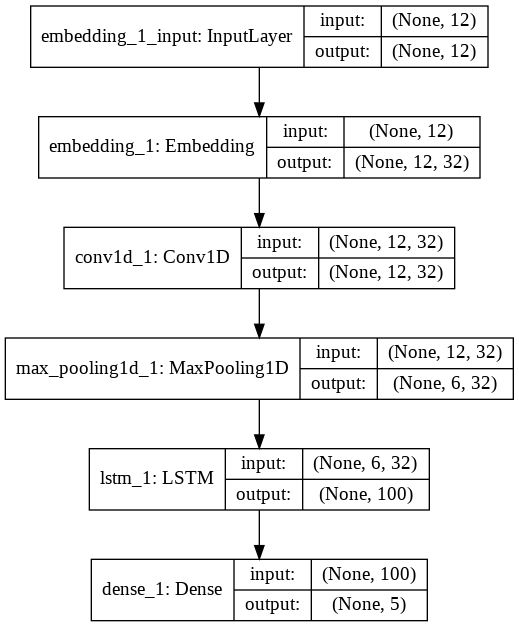

In [ ]:
# visualize model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# run prediction
test_pred = model.predict_classes(x_test)

In [ ]:
# edits the test file to input the prediction labels
test_df = pd.read_csv('/content/drive/My Drive/test.tsv', sep='\t', header=0)

In [ ]:
test_df['Sentiment'] = test_pred.reshape(-1,1) 
header = ['PhraseId', 'Sentiment']
test_df.to_csv('./final_predicted_model.csv', columns=header, index=False, header=True)